In [15]:
#import some stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle import get_telco_charge_data, wrangle_telco, get_zillow_data

In [2]:
#let's get our data! It's going to be customer_id, monthly_charges, tenure, and total_charges 
# for customers with 2 year contracts
df = get_telco_charge_data()

In [3]:
#making sure it looks as it would on SQL
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0002-ORFBO,65.60,9,593.3
1,0020-JDNXP,61.25,34,1993.2
2,0022-TCJCI,62.70,45,2791.5
3,0068-FIGTF,78.20,27,2078.95
4,0074-HDKDG,61.60,25,1611


In [4]:
#checking info, I'm going to check for nulls and also change total_charges to a numeric d-type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1473 non-null   object 
 1   monthly_charges  1473 non-null   float64
 2   tenure           1473 non-null   int64  
 3   total_charges    1473 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 46.2+ KB


In [5]:
#replace special blanks with NaN
df = df.replace(r'^\s*$', np.NaN, regex=True)

In [7]:
#1 entry in total_charges is NaN
df.isna().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      1
dtype: int64

In [8]:
#change total_charges to numeric, and then filled in NaN value with mean of total_charges
df.total_charges = pd.to_numeric(df.total_charges, errors='coerce').astype('float64')
df.total_charges = df.total_charges.fillna(value=df.total_charges.mean()).astype('float64')

In [9]:
#checking to make sure the value was filled in
df.isna().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

In [11]:
#checking to make sure the info looks good
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1473 non-null   object 
 1   monthly_charges  1473 non-null   float64
 2   tenure           1473 non-null   int64  
 3   total_charges    1473 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 46.2+ KB


In [2]:
#restarted kernal, testing out this cool wrangle_telco to see if it works!
df = wrangle_telco()

In [3]:
#oooh it's working
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0002-ORFBO,65.60,9,593.30
1,0020-JDNXP,61.25,34,1993.20
2,0022-TCJCI,62.70,45,2791.50
3,0068-FIGTF,78.20,27,2078.95
4,0074-HDKDG,61.60,25,1611.00


In [4]:
#eeeeeeee the total_charges are a float!!!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 0 to 1472
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1473 non-null   object 
 1   monthly_charges  1473 non-null   float64
 2   tenure           1473 non-null   int64  
 3   total_charges    1473 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 57.5+ KB


In [5]:
#I'm so excited
df.isna().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

In [1]:
#Zillow

In [2]:
df = get_zillow_data()

In [5]:
#let's see how it looks
df.tail()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0
2152862,4.0,4.0,2110.0,554009.0,2014.0,6761.20,6037.0


In [4]:
#nothing too out of the ordinary, technically there are half baths? Let me get back to it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [6]:
#looking at null values
df.isna().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [7]:
#just in case there are blanks
df = df.replace(r'^\s*$', np.NaN, regex=True)

In [8]:
#no blanks
df.isna().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [9]:
#checking most common bedroom count, most are between 3 and 4, but I'll do 3.
df.bedroomcnt.value_counts()

3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13187
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64

In [11]:
#fill in with 3.0
df.bedroomcnt = df.bedroomcnt.fillna(value=3.0)

In [12]:
#checking value counts for bathrooms
df.bathroomcnt.value_counts()

2.00     943589
3.00     422841
1.00     414324
2.50     142981
4.00      82155
1.50      31211
3.50      28518
5.00      28362
4.50      19506
0.00      13027
6.00      10747
5.50       6217
7.00       4394
8.00       1692
6.50       1333
9.00        713
7.50        384
10.00       325
11.00       146
8.50        110
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
11.50         3
12.50         3
1.75          3
14.50         1
19.00         1
19.50         1
32.00         1
Name: bathroomcnt, dtype: int64

In [13]:
#fill in with 2.0, since it is the most common.
df.bathroomcnt = df.bathroomcnt.fillna(value=2.0)

In [21]:
def get_heatmap(df):
    plt.figure(figsize=(8,12))
    heatmap = sns.heatmap(df.corr()[['taxvaluedollarcnt']].sort_values(by='taxvaluedollarcnt', ascending=False), vmin=-.5, vmax=.5, annot=True)
    heatmap.set_title('Feautures Correlating with Value')
    
    return heatmap

<AxesSubplot:title={'center':'Feautures Correlating with Value'}>

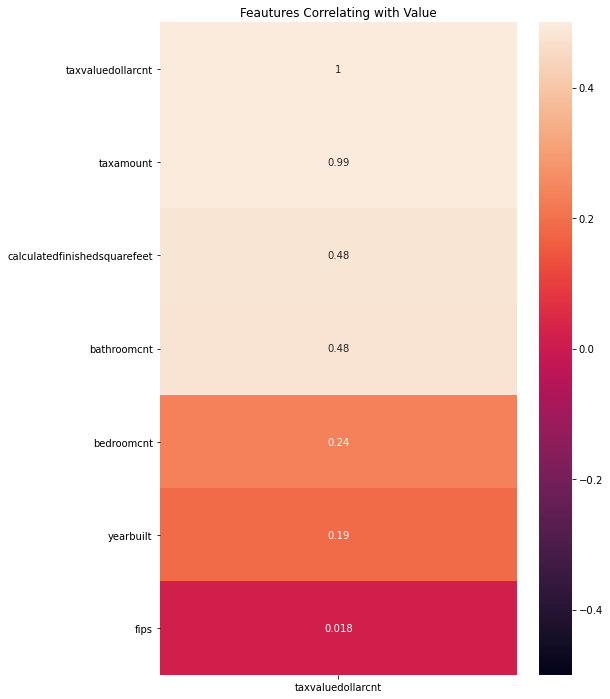

In [22]:
get_heatmap(df)